#  SOQCS Example 4: HOM Visibility simulation of a 2x2 MMI beamsplitter.

<p style='text-align: justify;'> We simulate a circuit made of a 2x2 MMI beamsplitter with two photons of Gaussian shape in each of the input channels. We consider the time, frequency and width given in random dimensionless units. At  the output we print the probability of having two photons in two different channels depending on the delay time between them. For delay dt=0 both photons are indistinguishable and the probability at the output is zero in ideal conditions. We consider time dependent losses in one of the channels and physical detectors that consider effects of efficiency, detector dead time, and dark counts. Furthermore we also include the effect of the presence of a white Gaussian noise over the output. </p>

In [1]:
import soqcs

## Building a plotting function with a SOQCS circuit

<p style='text-align: justify;'> Next, we build a function that contains the calculation of the probability of two photons to be found in different channels at the output of a MMI beamsplitter. The photons are initialized to be one at each channel at the MMI input with a relative delay dt between them. </p> 
<p style='text-align: justify;'>
<b>Note 1: </b> This is not the most efficient implementation.  All the objects have to be recreated for each point calculation. This code is implemented for demonstration purposes therefore it is intended to be simple. </p>
<p style='text-align: justify;'>
<b>Note 1: </b> The number of packets is the number of different single photon wavefunctions found in the simulation. In this case photons arrive at two different times therefore there are two possible packets. </p>

In [2]:
def HOMP(dt,args):
    #Build the circuit
    example = soqcs.qodev(nph=2,       # Number of photons
                          nch=2,       # Number of channels
                          nm =1,       # Number of polarizations
                          ns =2,       # Number of packets
                          clock=0,     # Detectors are configured as counters
                          R=10000,     # Number of iterations to calculate detector effects.
                          loss=True);  # Calculation of losses = True
    # Add photons with gaussian wavefunction 
    # at time t, frequency f and gaussian width w
    example.add_photons(1, 0, t =0.0, f=1.0, w=1.0)
    example.add_photons(1, 1, t = dt, f=1.0, w=1.0)    
    # Add a loss dependent of time for educative purposes
    example.loss(1, 0.3*(args[0]+dt)/(2*args[0])) 
    # MMI2 Beamsplitter
    example.MMI2(0,1)
    # Add detectors of efficiency eff, off with probability blnk 
    # (because of dead time for example) and thermal poison distribution 
    # of coefficient gamma
    example.detector(0,eff=0.85, blnk=0.1, gamma=0.4)
    example.detector(1,eff=0.85, blnk=0.1, gamma=0.4)
    # Add random noise
    example.noise(0.0001)
    
    # Create a simulator and run the simulation
    sim=soqcs.simulator()
    measured=sim.run(example)
    
    # Calculate the probability
    term=[[0,1], # Channels
          [1,1]] # Occupation
    prob=measured.prob(term,example)    
    
    # Return the probability
    return prob

## Plotting the function

This is the main program where the HOM effect probability is plotted.

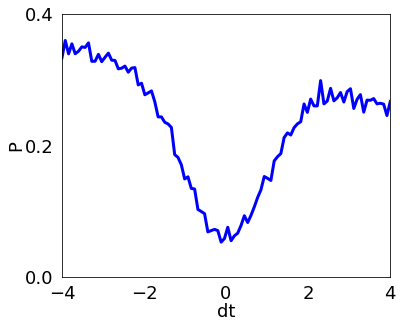

In [3]:
dtm=4 # Max/Min limit of dt in the plot
soqcs.plot(HOMP, 6, 5,'dt',-dtm, dtm, 5 , 'P',0.0 , 0.4, 3, 100, [{0:dtm}])

**THIS CODE IS PART OF SOQCS** <br>

**Copyright:** <br>
Copyright © 2023 National University of Ireland Maynooth, Maynooth University. All rights reserved.
The contents and use of this document and the related code are subject to the licence terms detailed in <a href="./assets/LICENCE.TXT">LICENCE.txt</a>